In [362]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import io
import math
from matplotlib import pyplot as plt

In [363]:
import warnings
warnings.simplefilter('ignore')

## Загрузим dataframe

In [364]:
train = pd.read_csv('C:\\Data\\Kaggle_credit_score\\train.csv')

In [365]:
train

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [366]:
test = pd.read_csv('C:\\Data\\Kaggle_credit_score\\test.csv')

In [367]:
test

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N
36345,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N
36346,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N
36347,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N


In [368]:
sample_submission = pd.read_csv('C:\\Data\\Kaggle_credit_score\\sample_submission.csv')

In [369]:
sample_submission

,client_id,default
0,74835,0
1,17527,0
2,75683,0
3,26883,0
4,28862,0
...,...,...
36344,83775,0
36345,106254,0
36346,81852,0
36347,1971,0


# **EDA**

## Смотрим на данные

* client_id идентификатор клиента
* education уровень образования
* sex пол заёмщика
* age возраст заёмщика
* car флаг наличия автомобиля
* car_type флаг автомобиля-иномарки
* decline_app_cnt количество отказанных прошлых заявок
* good_work флаг наличия «хорошей» работы
* bki_request_cnt количество запросов в БКИ
* home_address категоризатор домашнего адреса
* work_address категоризатор рабочего адреса
* income доход заёмщика
* foreign_passport наличие загранпаспорта
* sna - связь заемщика с клиентами банка
* first_time - давность наличия информации о заемщике
* score_bki - скоринговый балл по данным из БКИ
* region_rating - рейтинг региона
* default наличие дефолта

In [370]:
train

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [371]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

Качественные данные с точки зрения полноты - всего 307 пропусков. Фичи создержат все виды данных - числовые, категориальные, бинарные. Их обработкой займемся в разделе Feature Engineering.

In [372]:
test

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,83775,31MAR2014,SCH,F,37,N,N,1,0,-1.744976,3,50,2,3,15000,4,1,N
36345,106254,25APR2014,GRD,F,64,Y,Y,0,0,-2.293781,3,60,1,2,200000,1,4,N
36346,81852,30MAR2014,GRD,M,31,N,N,2,0,-0.940752,1,50,1,2,60000,4,2,N
36347,1971,07JAN2014,UGR,F,27,N,N,1,0,-1.242392,2,80,2,3,30000,1,1,N


In [373]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [374]:
# Оценим долю пропусков в данных
train.isna().mean()

client_id           0.00000
app_date            0.00000
education           0.00416
sex                 0.00000
age                 0.00000
car                 0.00000
car_type            0.00000
decline_app_cnt     0.00000
good_work           0.00000
score_bki           0.00000
bki_request_cnt     0.00000
region_rating       0.00000
home_address        0.00000
work_address        0.00000
income              0.00000
sna                 0.00000
first_time          0.00000
foreign_passport    0.00000
default             0.00000
dtype: float64

## Посмотрим на фичи датасета

Оценим распределение таргет-переменной



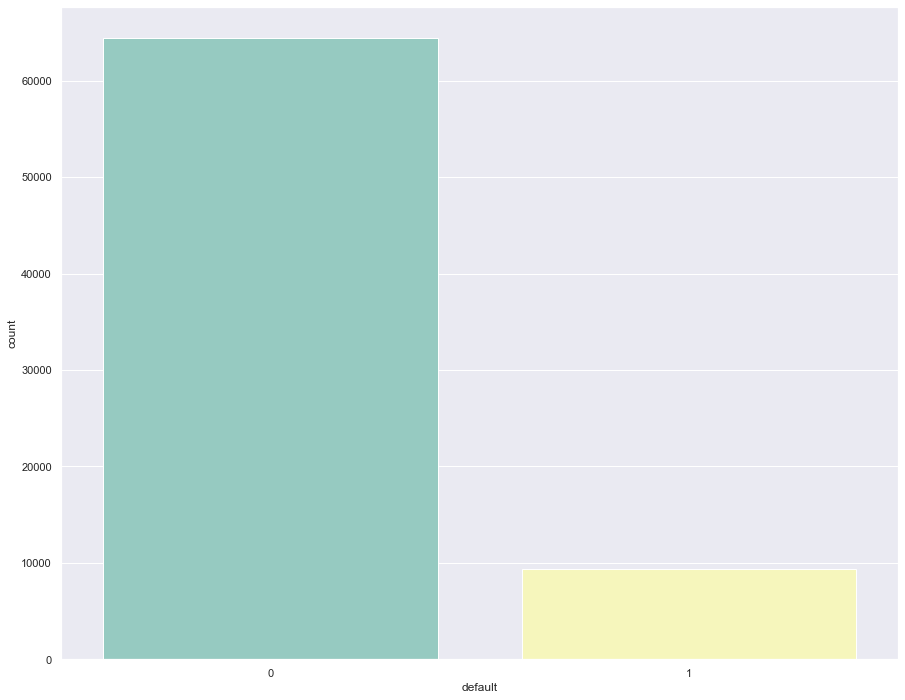

In [375]:
# 0 - Хороший заемщик, 1 - Заемщик с дефолтом
sns.countplot(x='default', data=train, palette="Set3");

In [376]:
# Процентное соотношение
train.default.value_counts(normalize=True)*100

0    87.300641
1    12.699359
Name: default, dtype: float64

In [377]:
# Сколько дефолтников и хороших плательщиков
train['default'].value_counts()

0    64427
1     9372
Name: default, dtype: int64

Как влияют отдельные переменные на просрочки?

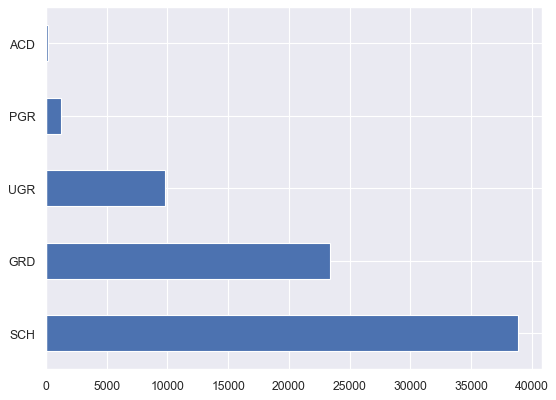

In [378]:
# Образование - распределение
figure(figsize=(8, 6), dpi=80)
train.education.value_counts().plot.barh();

In [379]:
train.groupby('education')['default'].agg(['count', 'mean'])

,count,mean
education,,
ACD,194,0.041237
GRD,23365,0.090092
PGR,1257,0.064439
SCH,38860,0.150592
UGR,9816,0.131520


In [380]:
# Пол
train.groupby('sex')['default'].agg(['count', 'mean'])

,count,mean
sex,,
F,41562,0.121241
M,32237,0.134411


Скорее всего пол покажет слабую корреляцию с таргет признаком.

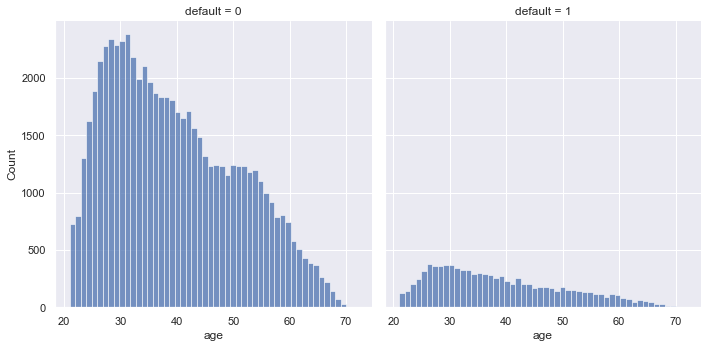

In [381]:
# Посмотрим на распределение по возрасту
sns.displot(train, x="age", col="default", bins=52)

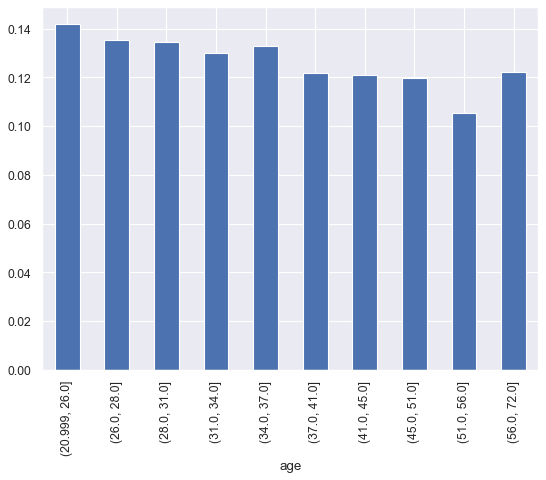

In [382]:
figure(figsize=(8, 6), dpi=80)
t = train[['age', 'default']]
t['age'] = pd.qcut(t['age'], 10)
t.groupby('age')['default'].mean().plot(kind='bar');

Можно заметить, что вероятность дефолта с возрастом снижается и минимальна, примерно, в диапазоне 50-56 лет

In [383]:
# Наличие машины, наличие иномарки
train.groupby('car')['default'].agg(['count', 'mean'])

,count,mean
car,,
N,49832,0.136960
Y,23967,0.106271


In [384]:
train.groupby('car_type')['default'].agg(['count', 'mean'])

,count,mean
car_type,,
N,59791,0.136258
Y,14008,0.087450


In [385]:
# Посмотрим в разрезе теблицы
pd.crosstab([ train.car, train.car_type], train.default, normalize='index')*100

default               0          1
car car_type                      
N   N         86.303981  13.696019
Y   N         86.725575  13.274425
    Y         91.254997   8.745003

Обратим внимание, что наличие отечественной машины почти не уменьшает вероятность дефолта, переменная имеет слабую корреляцию. Однако в случае с машиной иномаркой - вероятность падает, возможно стоит объединить переменные

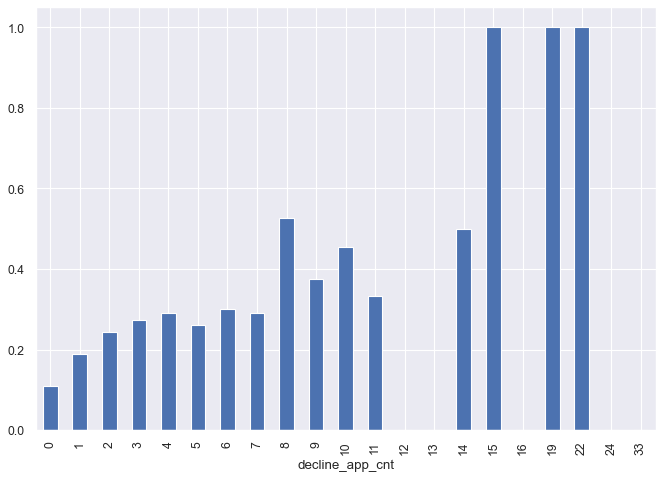

In [386]:
# Наличие отказных заявок к вероятности дефолта
figure(figsize=(10, 7), dpi=80)
train.groupby('decline_app_cnt')['default'].mean().plot(kind='bar');

In [387]:
pd.crosstab(train.decline_app_cnt, train.default, normalize='index')*100

default,0,1
decline_app_cnt,,
0,89.046623,10.953377
1,81.219483,18.780517
2,75.648298,24.351702
3,72.646733,27.353267
4,71.014493,28.985507
5,73.939394,26.060606
6,69.911504,30.088496
7,70.833333,29.166667
8,47.368421,52.631579


Видна линейная зависимость кол-ва отказных заявок к вероятности дефолта

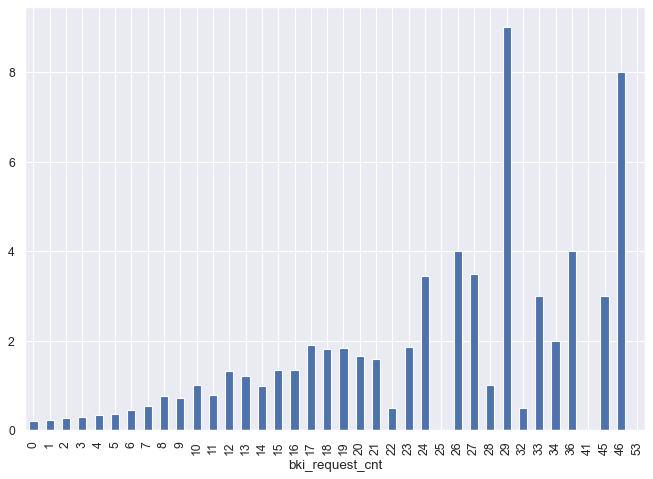

In [388]:
# Запросы в КИ
figure(figsize=(10, 7), dpi=80)
train.groupby('bki_request_cnt')['decline_app_cnt'].mean().plot(kind='bar');

In [389]:
t = train.groupby('bki_request_cnt')['default'].agg(['count', 'mean'])
t.sort_values('count', ascending=False).head()

,count,mean
bki_request_cnt,,
0,19381,0.094990
1,18276,0.118790
2,13749,0.132373
3,9187,0.145641
4,5627,0.151235


Видна аналогичная decline_app_cnt зависимость, скорее всего коррелирующие прищнаки

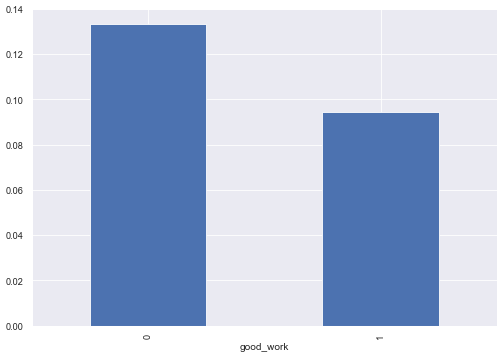

In [390]:
# Распределение хорошей работы к дефолту
figure(figsize=(10, 7), dpi=60)
train.groupby('good_work')['default'].mean().plot(kind='bar');

In [391]:
t = train.groupby('good_work')['default'].agg(['count', 'mean'])
t.sort_values('count', ascending=False).head()

,count,mean
good_work,,
0,61630,0.133409
1,12169,0.094502


In [392]:
train[train['default'] == 1]['good_work'].value_counts()

0    8222
1    1150
Name: good_work, dtype: int64

Почти в 90% случаях дефолтник не имеет хорошей работы

In [393]:
# SNA
t = train.groupby('sna')['default'].agg(['count', 'mean'])
t.sort_values('mean').head().head()

,count,mean
sna,,
1,47301,0.098201
2,10626,0.149821
3,4123,0.157652
4,11749,0.211507


sna 2 и sna 3 почти равны, это дает основания для группировки данных

In [394]:
# Давность первого обращения
t = train.groupby('first_time')['default'].agg(['count', 'mean'])
t.sort_values('mean')

,count,mean
first_time,,
4,18737,0.082030
3,31255,0.120269
2,11568,0.155429
1,12239,0.186126


Клиент с маленькой или отсутсвующей кредитной историейимеет риск дефолта в 2 раза больше, чем человек с длительной КИ. 

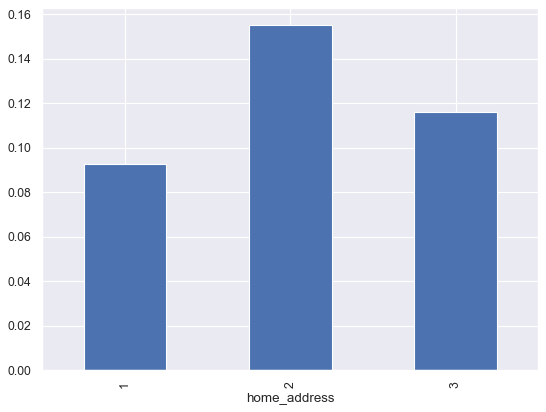

In [395]:
figure(figsize=(8, 6), dpi=80)
train.groupby('home_address')['default'].mean().plot(kind='bar');

In [396]:
t = train.groupby('home_address')['default'].agg(['count', 'mean'])
t.sort_values('mean')

,count,mean
home_address,,
1,32585,0.092896
3,1258,0.116057
2,39956,0.155146


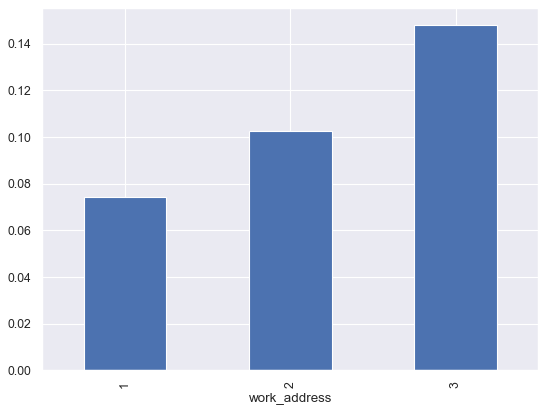

In [397]:
figure(figsize=(8, 6), dpi=80)
train.groupby('work_address')['default'].mean().plot(kind='bar');

In [398]:
t = train.groupby('work_address')['default'].agg(['count', 'mean'])
t.sort_values('mean')

,count,mean
work_address,,
1,8334,0.074154
2,20506,0.102507
3,44959,0.147957


В отличии от work_address - home_address не имеет линейной зависимости.

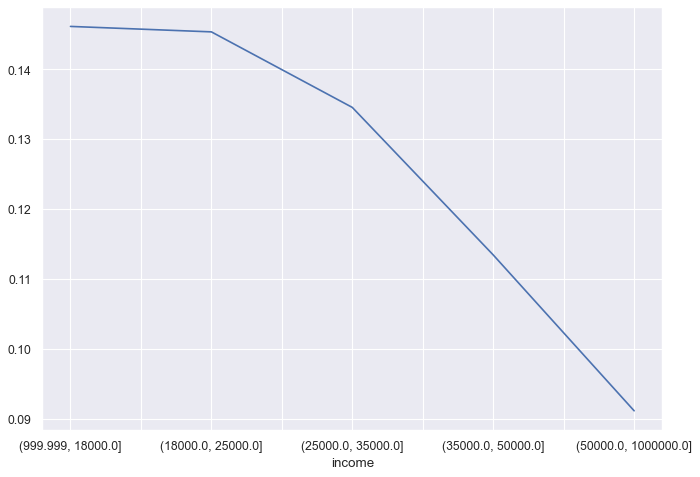

In [399]:
# Посмотрим на доход
figure(figsize=(10, 7), dpi=80)
t = train[['income', 'default']]
t['income'] = pd.qcut(t['income'], 5)
t.groupby('income')['default'].mean().plot();

In [400]:
train.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

Для клиентов с доходом менее 20000 риск дефолта максимальный. Увеличение дохода снижает риск дефолта.

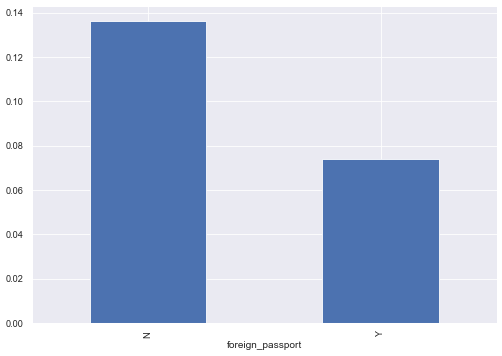

In [401]:
figure(figsize=(10, 7), dpi=60)
train.groupby('foreign_passport')['default'].mean().plot(kind='bar');

<AxesSubplot:>

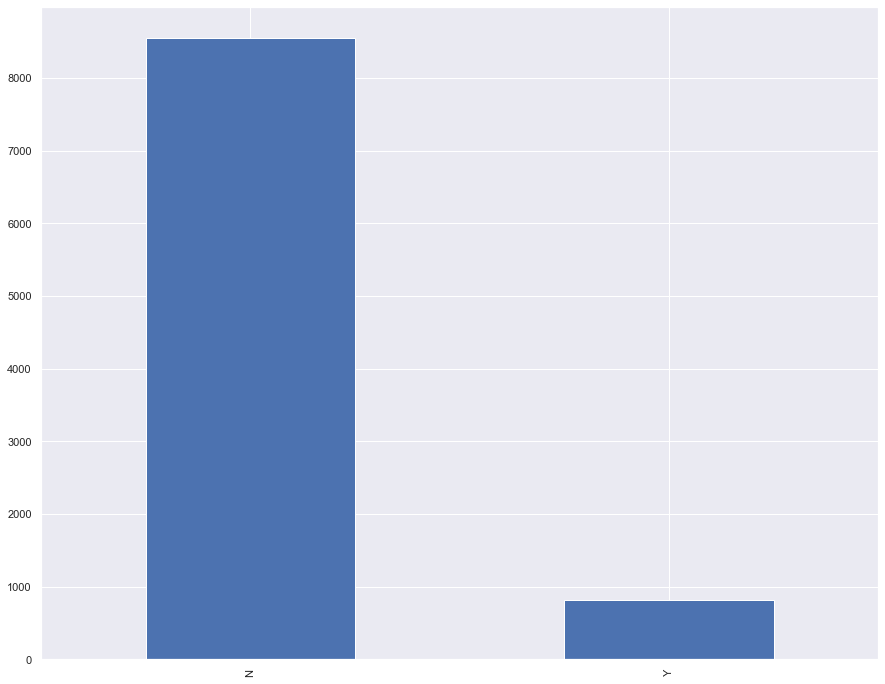

In [402]:
train[train['default'] == 1]['foreign_passport'].value_counts().plot(kind='bar')

Если у клиента отсутсвует иностранный паспорт - риск дефолта возрастает. Среди дефолтных клиентов только около 10% имеют загран паспорт

# **Feature Egineering**

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
%matplotlib inline

## Обработаем имеющиеся переменные



### Заполним пропуски

In [404]:
# Пропуски только в education, посмотрим внимательнее на распределение переменной
train.education.value_counts(dropna=False)

SCH    38860
GRD    23365
UGR     9816
PGR     1257
NaN      307
ACD      194
Name: education, dtype: int64

Предположим, что NaN принадлежат к одному классу, спрогнозируем его относительно целевой переменной


In [405]:
# Какой % должников у клиентов с пропуском в образовании
train[train.education.isna()]['default'].mean()

0.11400651465798045

In [406]:
# Посмотрим на % дефолтников в разрезе образования
train.groupby('education')['default'].agg(['count', 'mean'])

,count,mean
education,,
ACD,194,0.041237
GRD,23365,0.090092
PGR,1257,0.064439
SCH,38860,0.150592
UGR,9816,0.131520


Предположим, что NaN класс принадлежит бакалвриатам UGR

In [407]:
# Произведем замену
train['education'] = train['education'].fillna('UGR')

In [408]:
# В тестовых данных
test['education'] = test['education'].fillna('UGR')

In [409]:
# Убедимся, что пропусков нет
train.isna().mean()

client_id           0.0
app_date            0.0
education           0.0
sex                 0.0
age                 0.0
car                 0.0
car_type            0.0
decline_app_cnt     0.0
good_work           0.0
score_bki           0.0
bki_request_cnt     0.0
region_rating       0.0
home_address        0.0
work_address        0.0
income              0.0
sna                 0.0
first_time          0.0
foreign_passport    0.0
default             0.0
dtype: float64

In [410]:
test.isna().mean()

client_id           0.0
app_date            0.0
education           0.0
sex                 0.0
age                 0.0
car                 0.0
car_type            0.0
decline_app_cnt     0.0
good_work           0.0
score_bki           0.0
bki_request_cnt     0.0
region_rating       0.0
home_address        0.0
work_address        0.0
income              0.0
sna                 0.0
first_time          0.0
foreign_passport    0.0
dtype: float64

### Обработаем sna

При проведении EDA мы обнаружили, что SNA = 2 и 3 сильно скорелированы, попробуем их объединить

In [411]:
train['sna'].value_counts()

1    47301
4    11749
2    10626
3     4123
Name: sna, dtype: int64

In [412]:
 for i in range(len(train)):
    if train['sna'][i] == 3:
      train['sna'][i] = 2
    if train['sna'][i] == 4:
      train['sna'][i] = 3  

In [413]:
train['sna'].value_counts()

1    47301
2    14749
3    11749
Name: sna, dtype: int64

In [414]:
 for i in range(len(test)):
    if test['sna'][i] == 3:
      test['sna'][i] = 2
    if test['sna'][i] == 4:
      test['sna'][i] = 3

test['sna'].value_counts()  

1    23380
2     7237
3     5732
Name: sna, dtype: int64

## Добавим новые переменные

In [415]:
# подготовим DF для модернизации и добавления новых фич
train_new = train.copy()
test_new = test.copy()

<AxesSubplot:>

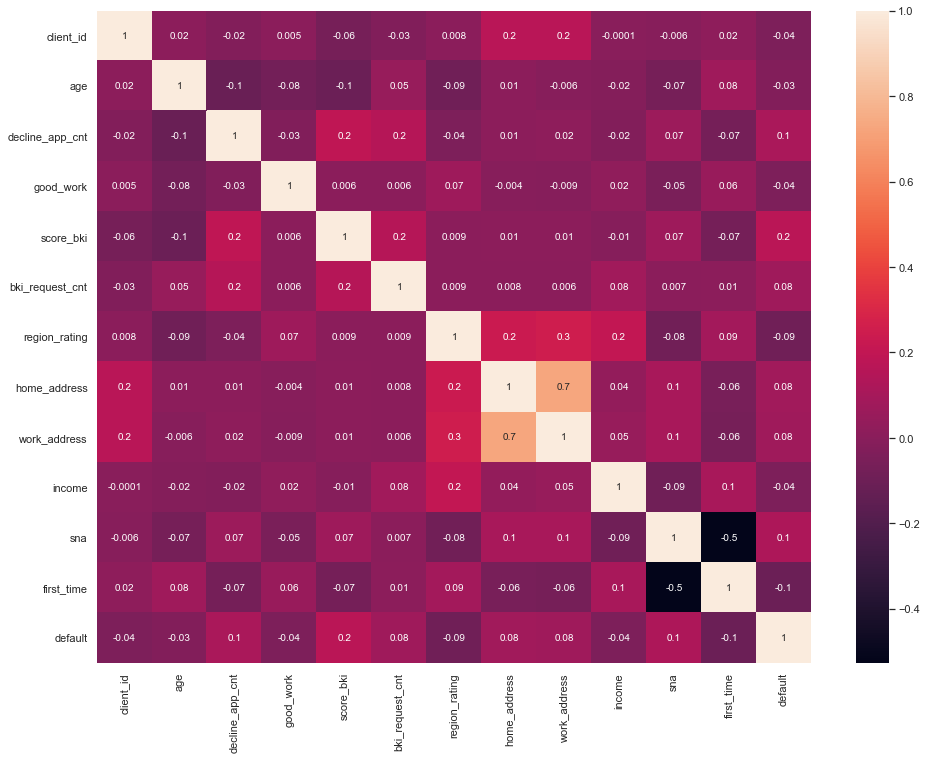

In [416]:
# heatmap для оценки корреляции переменных к default
plt.rcParams['figure.figsize']=16,12
sns.heatmap(train.corr(), annot = True, fmt='.1g')

Самую большую корреляцию нам дает score_bki, sna, first_time, decline_app_cnt, а такие переменные, как age, good_work, income дают слабую зависимость, они могут мешать линейной модели. Для теста соберем указанные переменные

In [417]:
slow_corr_features = ['age', 'good_work', 'income']
high_corr_features = ['score_bki', 'sna', 'first_time', 'decline_app_cnt']

### *Предположение 1:* создадим переменную score_rating и будем указывать модели клиентов с повышенными рисками (неудачно)

Посмотрим на score_bki

In [418]:
t = train[train['default']==1]
t.score_bki.quantile([0.25,0.5,0.75])

0.25   -2.015871
0.50   -1.683857
0.75   -1.337922
Name: score_bki, dtype: float64

Предпологаю, что если поставить метки на первый квартиль - модель может получить важный сигнал для обобщения

Далее посмотрим на sna

In [419]:
pd.crosstab([train.sna], train.default, normalize='index')*100

default,0,1
sna,,
1,90.179912,9.820088
2,84.798969,15.201031
3,78.849264,21.150736


Флаг делаем на sna = 3

Далее посмотрим на first_time

In [420]:
pd.crosstab([train.first_time], train.default, normalize='index')*100

default,0,1
first_time,,
1,81.387368,18.612632
2,84.457123,15.542877
3,87.973124,12.026876
4,91.796979,8.203021


Флаг делаем на first_time	 = 1

Далее посмотрим на decline_app_cnt

In [421]:
pd.crosstab([train.decline_app_cnt], train.default, normalize='index')*100

default,0,1
decline_app_cnt,,
0,89.046623,10.953377
1,81.219483,18.780517
2,75.648298,24.351702
3,72.646733,27.353267
4,71.014493,28.985507
5,73.939394,26.060606
6,69.911504,30.088496
7,70.833333,29.166667
8,47.368421,52.631579


Флаг делаем на decline_app_cnt > 1

Предположение 1

Создав новую синтетическую переменную на основе фич с высокой корреляцей, где мы вручную отметим высокий риск дефолта - сможем получить качественную переменню

In [422]:
def scor_in_scor(data):
  ## Функция рассчитывает класс вероятности дефолта, где 0 - вероятность низкая, 4 - максимальная.
  
    df = data.copy()
    df['score_rating'] = pd.Series([0 for x in range(len(df.index))])
    for i in range(len(df)):
        if df['score_bki'][i] < -2.015871:
            df['score_rating'][i] += 1
        if df['sna'][i] == 3: 
            df['score_rating'][i] += 1,
        if df['first_time'][i] == 1: 
            df['score_rating'][i] += 1
        if df['decline_app_cnt'][i] > 1: 
            df['score_rating'][i] += 1
    return df

In [423]:
train_new

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,3,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,3,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,3,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [424]:
train_new_test = scor_in_scor(train_new)

In [425]:
pd.crosstab([train_new_test.score_rating], train_new_test.default, normalize='index')*100

default,0,1
score_rating,,
0,86.715980,13.284020
1,89.823851,10.176149
2,80.803518,19.196482
3,84.424045,15.575955
4,79.310345,20.689655


<AxesSubplot:>

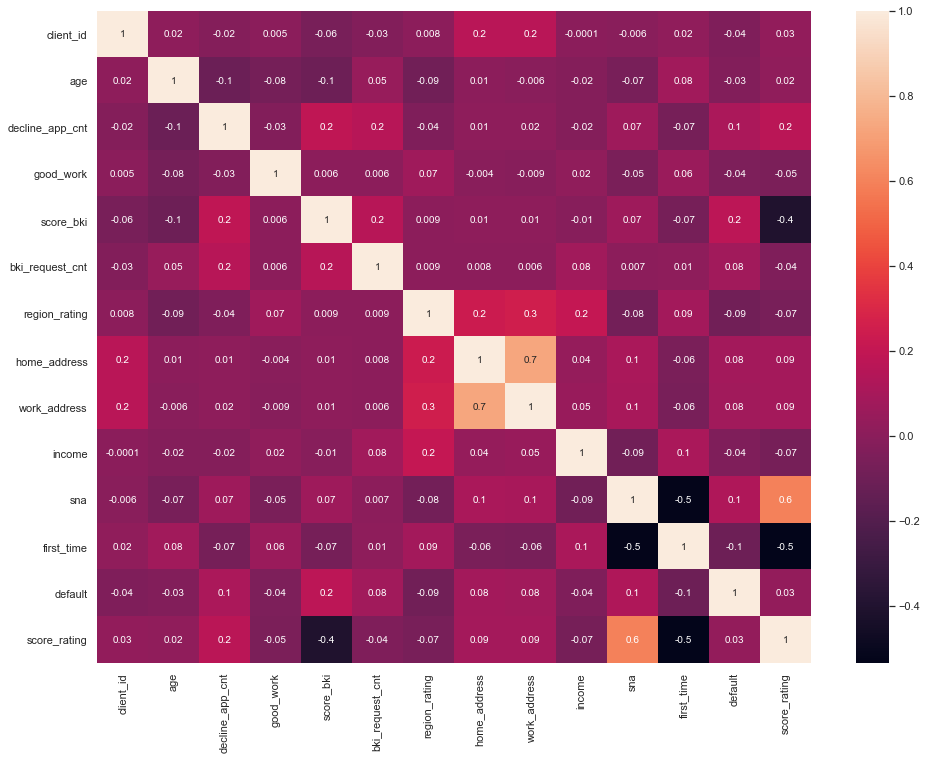

In [426]:
plt.rcParams['figure.figsize']=16,12
sns.heatmap(train_new_test.corr(), annot = True, fmt='.1g')

Корреляция нового признака низкая, разбиение при crosstab так же не дает оснований для использования в модели

### *Предположение 2:* рассчитаем метрику , характеризующую одновременно work_address work_addres

In [427]:
def adress_sum(data):
  ## Функция призвана объединить две переменные home_address work_addres с целью увелечения значимости и уменьшения кол-ва переменных 
  
    df = data.copy()
    df['adress_sum'] = pd.Series([0 for x in range(len(df.index))])
    for i in range(len(df)):
        df['adress_sum'][i] = df['home_address'][i] + df['work_address'][i]
    return df

In [428]:
train_new_test = adress_sum(train_new)

In [429]:
train_new_test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,adress_sum
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,3,1,N,0,3
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,3,1,N,0,5
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,3
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,5
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,5


In [430]:
pd.crosstab([train_new_test.adress_sum, train_new_test.home_address,
             train_new_test.work_address], train.default, normalize='index')*100

default                                        0          1
adress_sum home_address work_address                       
2          1            1              92.444610   7.555390
3          1            2              89.845805  10.154195
           2            1              96.014493   3.985507
4          1            3              91.259690   8.740310
           2            2              88.195777  11.804223
           3            1             100.000000   0.000000
5          2            3              84.303018  15.696982
           3            2              86.301370  13.698630
6          3            3              88.285960  11.714040

<AxesSubplot:>

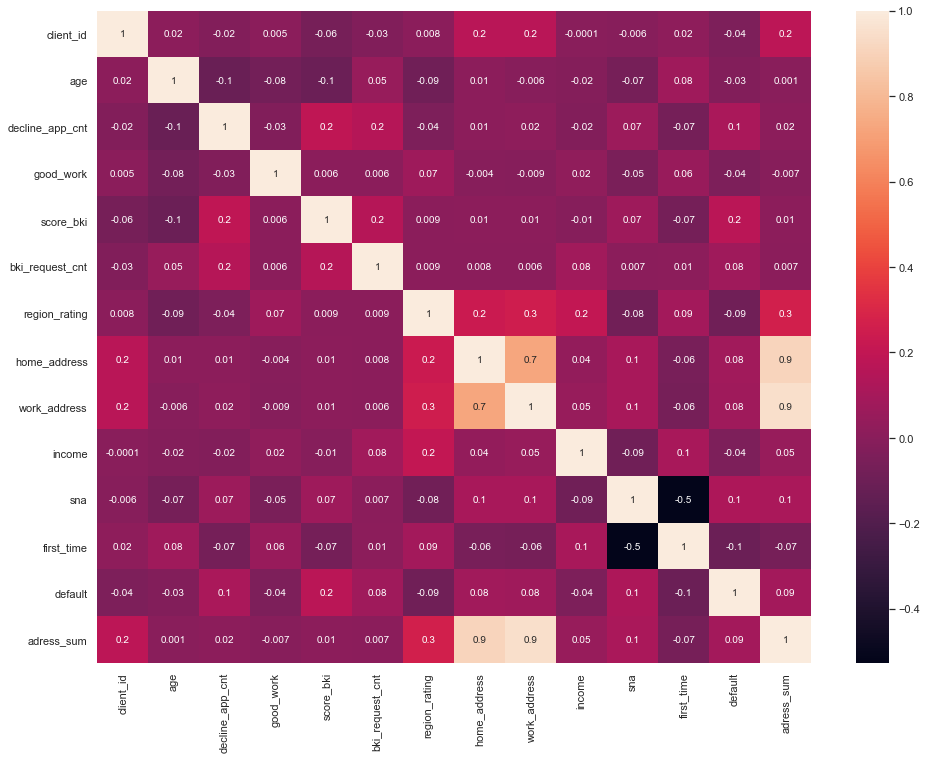

In [431]:
plt.rcParams['figure.figsize']=16,12
sns.heatmap(train_new_test.corr(), annot = True, fmt='.1g')

adress_sum дает чуть более высокую корреляцию, нежели home_address и work_address по отдельности, поэтому будем использовать эту фичю взамен первоначальных данных	

In [432]:
# Формируем новый признак
train_new = adress_sum(train_new)
test_new = adress_sum(test_new)

In [433]:
# Удалим неактуальные признаки
adress_to_drop = ['home_address',	'work_address']
train_new = train_new.drop(adress_to_drop, axis=1)
test_new = test_new.drop(adress_to_drop, axis=1)

### *Предположение 3:* 4 NO: Car, Foregin passport, sna - снова пометим уровень риска, в зависимости от указаных переменных

Идея заключается в том, что для нас самый рискованный клиент не имеет машины, загран паспорта и хорошей работы. А увеличение связи с негативными родственниками должниками премножает риск

In [434]:
def no_4(data):
    """Функция рассчета балло за риск"""

    df = data.copy()
    df['risk_score'] = pd.Series([0 for x in range(len(df.index))])
    for i in range(len(df)):
        if df['car'][i] == 'N' and df['foreign_passport'][i] == 'N' and df['good_work'][i] == 0:
            if df['sna'][i] > 1:
                if df['sna'][i] > 2:
                    if df['sna'][i] == 4:
                        df['risk_score'][i] = 4
                    else: df['risk_score'][i] = 3
                else: df['risk_score'][i] = 2
            else: df['risk_score'][i] = 1
        else: df['risk_score'][i] = 0
    return df

In [435]:
train_new_test = no_4(train_new)

In [436]:
train_new_test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,sna,first_time,foreign_passport,default,adress_sum,risk_score
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,18000,3,1,N,0,3,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,19000,3,1,N,0,5,3
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,30000,1,4,Y,0,3,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,10000,1,3,N,0,5,1
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,30000,1,4,Y,0,5,0


In [437]:
pd.crosstab([train_new_test.risk_score], train.default, normalize='index')*100

default,0,1
risk_score,,
0,89.672476,10.327524
1,88.105768,11.894232
2,83.320443,16.679557
3,77.381906,22.618094


<AxesSubplot:>

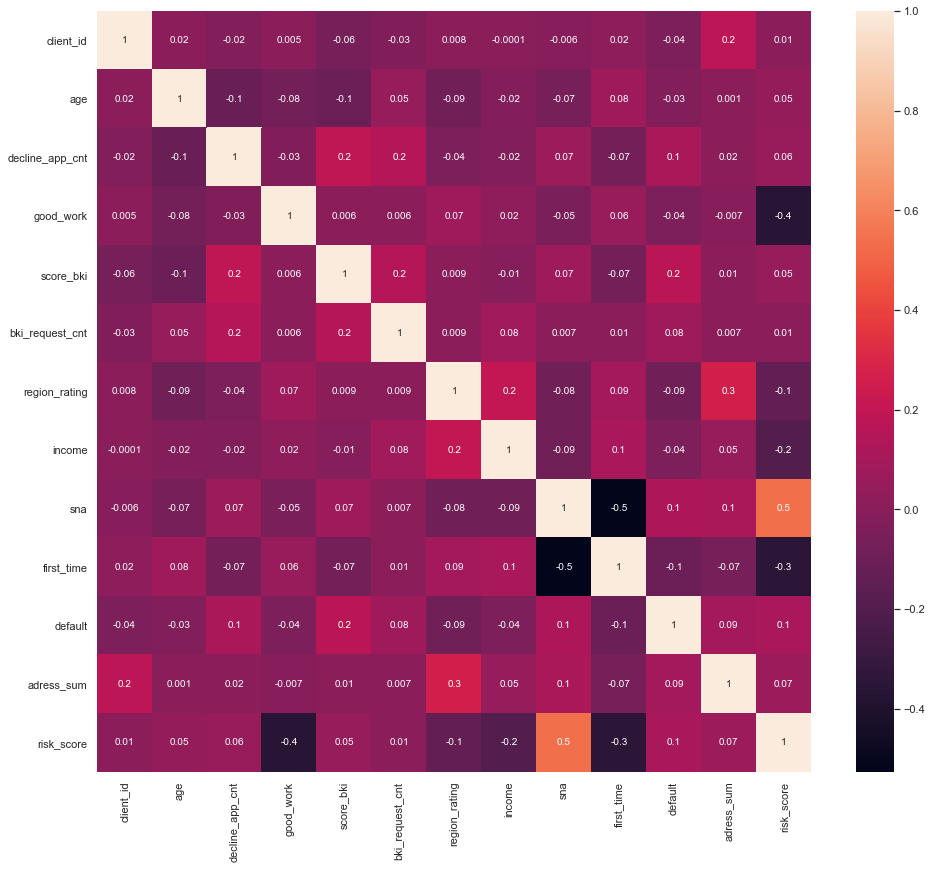

In [438]:
plt.rcParams['figure.figsize']=16,14
sns.heatmap(train_new_test.corr(), annot = True, fmt='.1g')

Новая синтетическая переменная risk_score показывает относительно высокую корреляцию для таргет переменной, занесем ее в рабочие датасеты

In [439]:
train_new = no_4(train_new)
test_new = no_4(test_new)

## Удалим лишние переменные

Удалим переменные на основе EDA анализа

In [440]:
# client_id	и app_date - лишние переменные, избавимся от них
train = train.drop('client_id', axis=1)
train = train.drop('app_date', axis=1)
test = test.drop('client_id', axis=1)
test = test.drop('app_date', axis=1)

In [441]:
train_new = train_new.drop('app_date', axis=1)
train_new = train_new.drop('client_id', axis=1)
test_new = test_new.drop('app_date', axis=1)
test_new = test_new.drop('client_id', axis=1)

При помощи корреляционного анализа, примм решение об удалении признков слабо корилируемых признаков.

In [442]:
# Введем новые df, их и будем укорачивать
train_new_short = train_new.copy()
test_new_short = test_new.copy()

<AxesSubplot:>

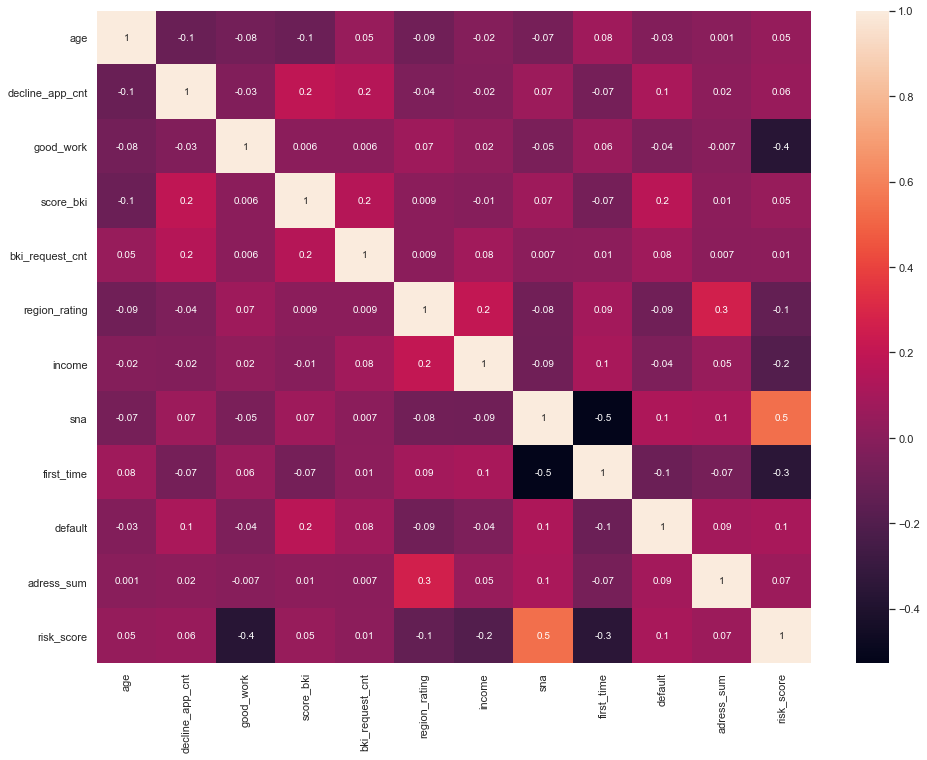

In [443]:
plt.rcParams['figure.figsize']=16,12
sns.heatmap(train_new_short.corr(), annot = True, fmt='.1g')

In [444]:
column_to_drop = ['age', 'good_work', 'income']
train_new_short.shape

(73799, 17)

In [445]:
train_new_short = train_new_short.drop(column_to_drop, axis=1)
test_new_short = test_new_short.drop(column_to_drop, axis=1)
train_new_short.shape

(73799, 14)

## Обработаем переменные под модель

In [446]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
bin_cols_short = ['sex', 'car', 'car_type', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address', 'sna',	'first_time', 'region_rating'] 
cat_cols_new = ['education', 'region_rating', 'sna', 'first_time']

#числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki']
num_cols_new = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income', 'score_bki', 'adress_sum',	'risk_score']
num_cols_short = ['decline_app_cnt', 'bki_request_cnt', 'score_bki', 'adress_sum',	'risk_score']

In [447]:
train_new

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,income,sna,first_time,foreign_passport,default,adress_sum,risk_score
0,SCH,M,62,Y,Y,0,0,-2.008753,1,50,18000,3,1,N,0,3,0
1,SCH,F,59,N,N,0,0,-1.532276,3,50,19000,3,1,N,0,5,3
2,SCH,M,25,Y,N,2,0,-1.408142,1,80,30000,1,4,Y,0,3,0
3,SCH,F,53,N,N,0,0,-2.057471,2,50,10000,1,3,N,0,5,1
4,GRD,M,48,N,N,0,1,-1.244723,1,60,30000,1,4,Y,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,GRD,F,45,N,N,0,0,-1.792064,3,50,17000,3,4,N,0,3,3
73795,SCH,M,41,Y,Y,0,0,-2.058029,1,50,70000,1,4,N,0,4,0
73796,SCH,M,31,N,N,0,0,-1.512635,4,80,45000,2,2,N,0,5,2
73797,SCH,F,29,N,N,0,1,-1.479334,3,50,13000,2,3,N,1,4,0


### Обработаем бинарные переменные, LabelEncoder

In [448]:
label_encoder = LabelEncoder()

In [449]:
def bin_label_encoder(data_fit, data_transform, list_for_fit_transform):
    """Функция для подготовки бинарных переменных. На вход DF для обучения, DF для трансформации и бинарные колонки 
    Сначала преобразуем тестовые данные, только потом сам треин!"""

    data_full = data_transform.copy()
    for col in list_for_fit_transform:
        l_e = label_encoder.fit(data_fit[col])
        data_full[col] = l_e.transform(data_full[col])

    return data_full

In [450]:
# Original DF
test = bin_label_encoder(train, test, bin_cols)
train = bin_label_encoder(train, train, bin_cols)

In [451]:
# New DF
test_new = bin_label_encoder(train_new, test_new, bin_cols)
train_new = bin_label_encoder(train_new, train_new, bin_cols)

In [452]:
# Short DF
test_new_short = bin_label_encoder(train_new_short, test_new_short, bin_cols_short)
train_new_short = bin_label_encoder(train_new_short, train_new_short, bin_cols_short)


## Обработаем числовые переменные, StandardScaler

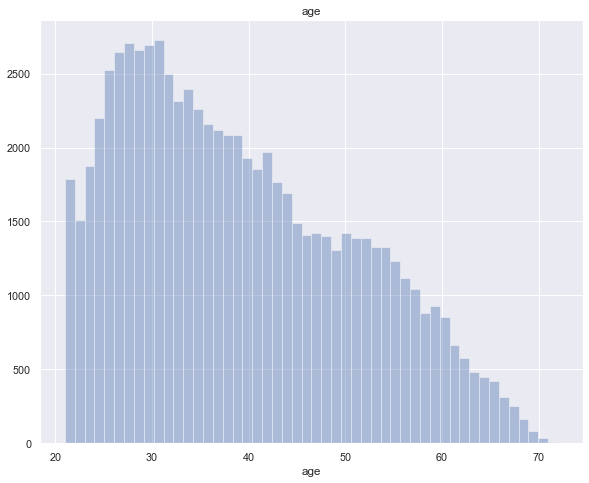

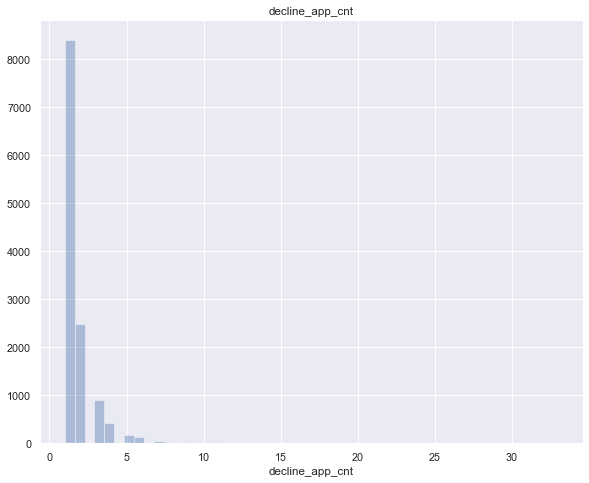

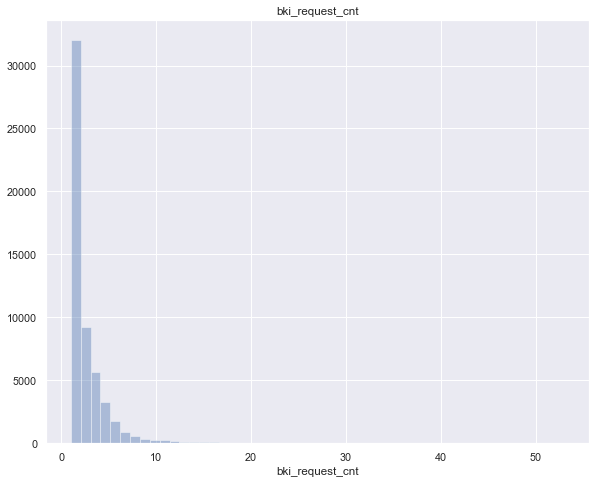

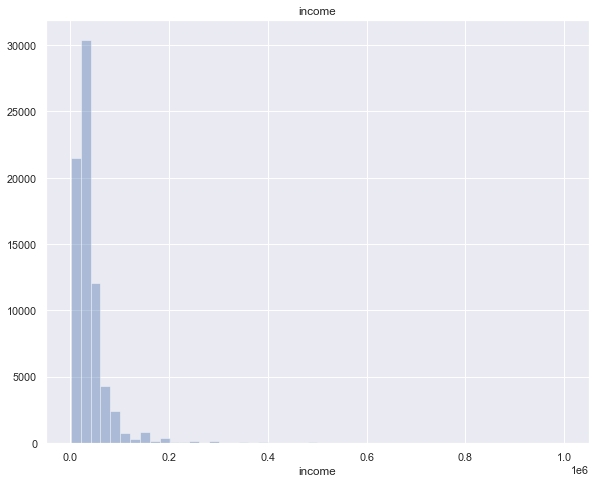

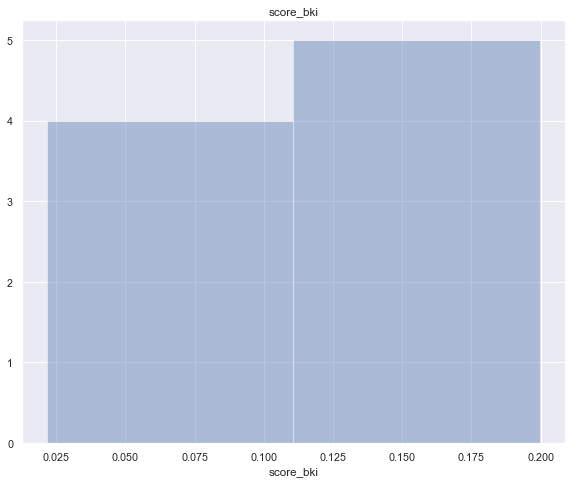

In [453]:
# Посмотрим на распределение признаков num_cols
for i in num_cols:

    plt.figure(figsize=(10, 8), dpi=70)
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

Проведем стандартизация числовых переменных


In [454]:
def num_StandardScaler(data_fit, data_transform, list_for_fit_transform):
    """Функция для подготовки бинарных переменных. На вход DF для обучения, DF для трансформации и бинарные колонки
    Сначала преобразуем тестовые данные, только потом сам треин!"""

    data_out = data_transform.copy()
    std = StandardScaler()

    std.fit(data_fit[list_for_fit_transform].values)
    X_num = std.transform(data_transform[list_for_fit_transform].values)

    X_num = pd.DataFrame(X_num, columns=list_for_fit_transform)
    X_num.index = data_transform.index

    data_out[list_for_fit_transform] = X_num[list_for_fit_transform]

    return data_out

In [455]:
# Original DF
test = num_StandardScaler(train, test, num_cols)
train = num_StandardScaler(train, train, num_cols)

In [456]:
# New DF
test_new = num_StandardScaler(train_new, test_new, num_cols_new)
train_new = num_StandardScaler(train_new, train_new, num_cols_new)

In [457]:
# Short DF
test_new_short = num_StandardScaler(train_new_short, test_new_short, num_cols_short)
train_new_short = num_StandardScaler(train_new_short, train_new_short, num_cols_short)


In [458]:
#tr = train.copy()
#std = StandardScaler()
# Стандартизация числовых переменных, получим numpy.ndarray
#std.fit(tr[num_cols].values)
#X_num = std.transform(t[num_cols].values)
# Создадим из матрицы DF
#X_num = pd.DataFrame(X_num, columns=num_cols)
#X_num.index = t.index
# Заменим значения
#t['age'] = X_num['age']
#t['decline_app_cnt'] = X_num['decline_app_cnt']
#t['bki_request_cnt'] = X_num['bki_request_cnt']
#t['income'] = X_num['income']

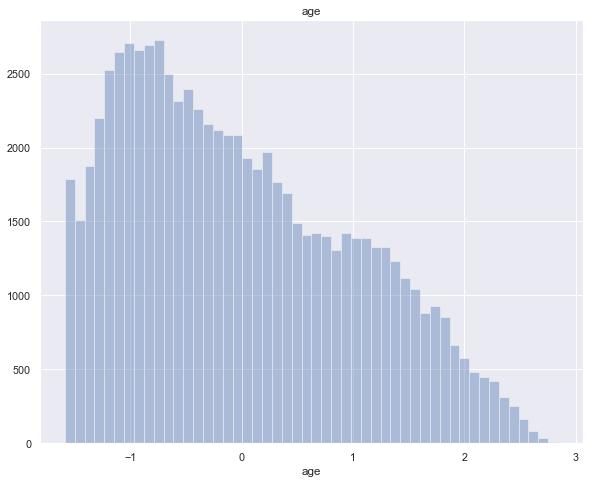

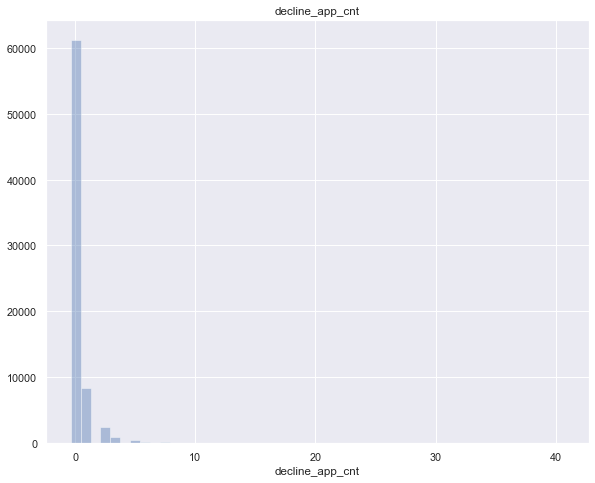

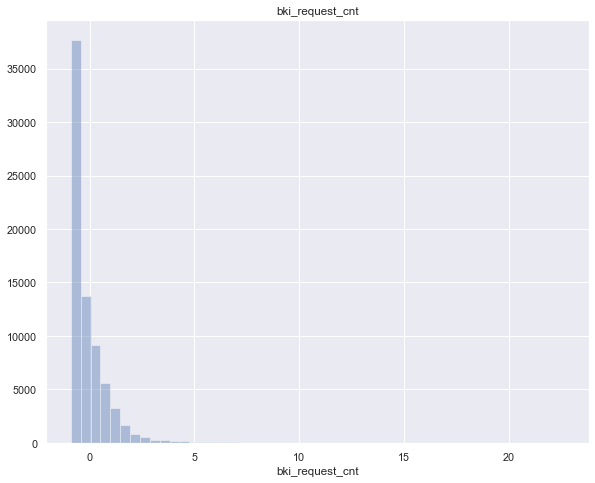

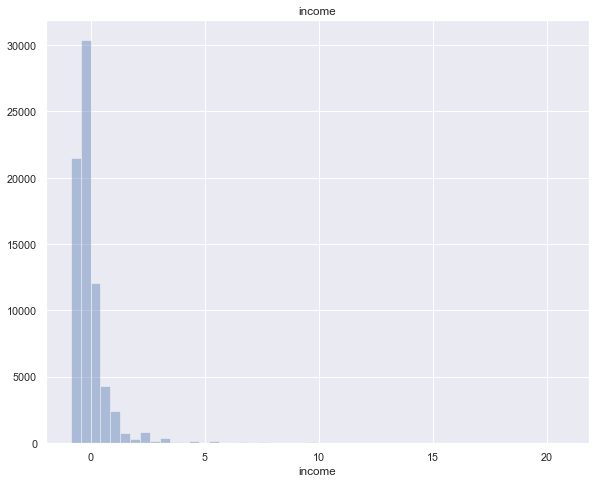

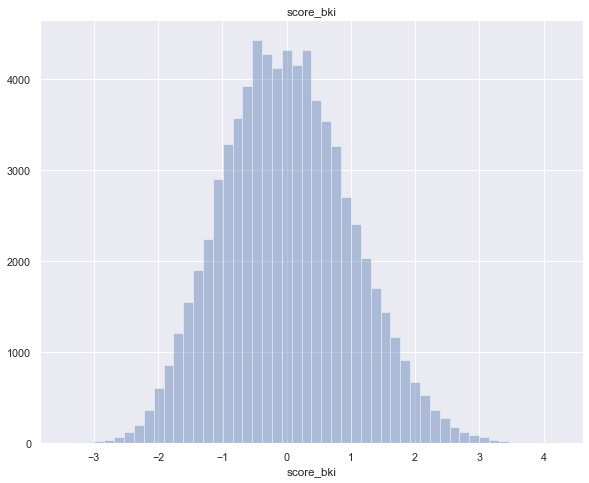

In [459]:
# Посмотрим на распределение числовых переменных после стандартизации 
for i in num_cols:
    plt.figure(figsize=(10, 8), dpi=70)
    sns.distplot(train[i].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

<AxesSubplot:>

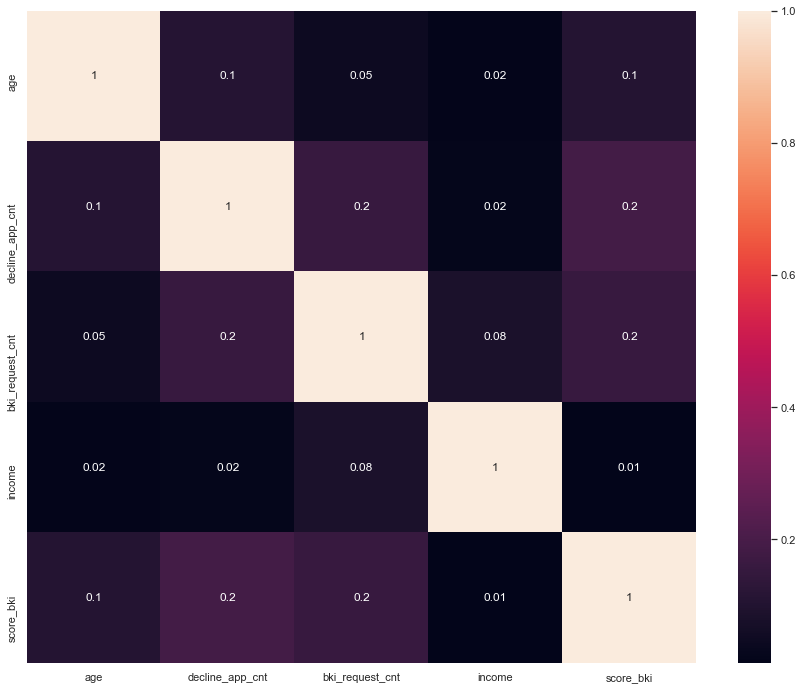

In [460]:
# Посмотрим на корреляцию признаков
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(train[num_cols].corr().abs(), annot = True, fmt='.1g')

## Обработаем категориальные признаки, OneHotEncoder

In [461]:
def OneHotEncoder_1(data_fit, data_transform, list_for_fit_transform):
    """Функция для подготовки OneHotEncoder 1. На вход DF для обучения, DF и колонки для трансформациии. Возвращает матрицу значений, категории для создания колонок.
    Ктегории для создания колонок необходимо вручную преобразовать в лист col_encoded для использования в OneHotEncoder_2
    Сначала преобразуем тестовые данные, только потом сам train!"""

    data_out = data_transform.copy()
    ohe = OneHotEncoder(sparse=False)

    ohe.fit(data_fit[list_for_fit_transform].values)
    matrix_value = ohe.transform(data_transform[list_for_fit_transform].values)

    return matrix_value, ohe.categories_

In [462]:
def OneHotEncoder_2(matrix_value, col_encoded, list_for_fit_transform, data_transform):
    """Функция для подготовки OneHotEncoder 2. На вход матрица значений, название колонок, DF для join, на выход готовый df.
    Сначала преобразуем тестовые данные, только потом сам train!"""

    df_encoded = pd.DataFrame(matrix_value, columns=col_encoded)
    df_encoded.index = data_transform.index
    data_transform = data_transform.join(df_encoded)
    data_transform = data_transform.drop(list_for_fit_transform, axis=1)

    return data_transform

### Classic DF

Test

In [463]:
ohe_matrix, cat = OneHotEncoder_1(train, test, cat_cols)

In [464]:
col_ecoded = ['ACD', 'GRD', 'PGR', 'SCH', 'UGR', 
              'work_address_1', "work_address_2", "work_address_3", 
              'home_address_1', 'home_address_2', 'home_address_3',
              "sna1", "sna2", "sna3",
              "first_time1", "first_time2", "first_time3", "first_time4",
              "region_rating20", "region_rating30", "region_rating40",
              "region_rating50", "region_rating60", "region_rating70",
              "region_rating80"]

In [465]:
test = OneHotEncoder_2(ohe_matrix, col_ecoded, cat_cols, test)

Train

In [466]:
ohe_matrix, cat = OneHotEncoder_1(train, train, cat_cols)

In [467]:
train = OneHotEncoder_2(ohe_matrix, col_ecoded, cat_cols, train)

Оценим значимость категориальных признаков

In [468]:
list_for_mutual_info_classif = col_ecoded + bin_cols

<AxesSubplot:>

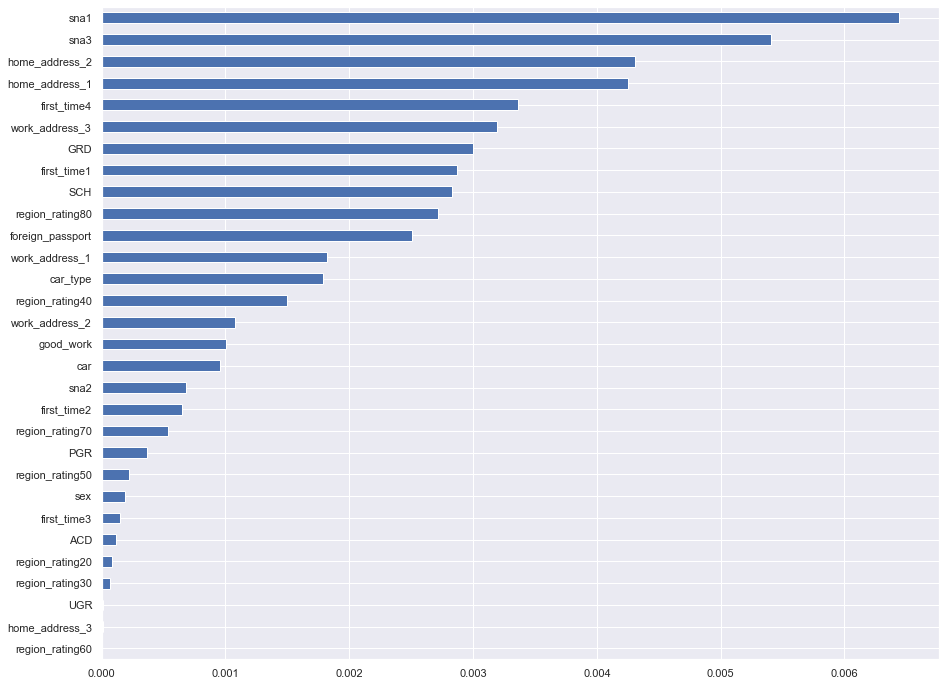

In [469]:
imp_cat = pd.Series(mutual_info_classif(train[list_for_mutual_info_classif], train['default'],
                                     discrete_features =True), index = list_for_mutual_info_classif)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

### Test DF

Test

In [470]:
ohe_matrix, cat = OneHotEncoder_1(train_new, test_new, cat_cols_new)
cat

[array(['ACD', 'GRD', 'PGR', 'SCH', 'UGR'], dtype=object),
 array([20, 30, 40, 50, 60, 70, 80], dtype=object),
 array([1, 2, 3], dtype=object),
 array([1, 2, 3, 4], dtype=object)]

In [471]:
col_ecoded_new = ['ACD', 'GRD', 'PGR', 'SCH', 'UGR',
              "region_rating20", "region_rating30", "region_rating40",
              "region_rating50", "region_rating60", "region_rating70",
              "region_rating80", 
              "sna1", "sna2", "sna3",
              "first_time1", "first_time2", "first_time3", "first_time4"]
              

In [472]:
test_new = OneHotEncoder_2(ohe_matrix, col_ecoded_new, cat_cols_new, test_new)

Train

In [473]:
ohe_matrix, cat = OneHotEncoder_1(train_new, train_new, cat_cols_new)

In [474]:
train_new = OneHotEncoder_2(ohe_matrix, col_ecoded_new, cat_cols_new, train_new)

### Test_short DF

In [475]:
test_new_short

,education,sex,car,car_type,decline_app_cnt,score_bki,bki_request_cnt,region_rating,sna,first_time,foreign_passport,adress_sum,risk_score
0,GRD,1,1,1,-0.342858,-0.736932,0.443888,50,1,4,0,-0.945762,-0.815845
1,SCH,0,0,0,5.873986,0.802293,-0.000150,50,3,3,0,-0.945762,2.220953
2,UGR,1,1,1,-0.342858,0.428287,-0.444189,50,1,3,1,-0.945762,-0.815845
3,SCH,1,0,0,-0.342858,-0.942258,-0.444189,40,1,3,0,-0.945762,0.196421
4,GRD,0,0,0,-0.342858,-1.169704,-0.888227,80,1,3,0,0.819066,0.196421
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,SCH,0,0,0,0.900511,0.320632,0.443888,50,3,1,0,0.819066,2.220953
36345,GRD,0,1,1,-0.342858,-0.780884,0.443888,60,1,4,0,-0.945762,-0.815845
36346,GRD,1,0,0,2.143880,1.934802,-0.444189,50,3,2,0,-0.945762,2.220953
36347,UGR,0,0,0,0.900511,1.329376,-0.000150,80,1,1,0,0.819066,0.196421


test

In [476]:
ohe_matrix, cat = OneHotEncoder_1(train_new_short, test_new_short, cat_cols_new)
cat

[array(['ACD', 'GRD', 'PGR', 'SCH', 'UGR'], dtype=object),
 array([20, 30, 40, 50, 60, 70, 80], dtype=object),
 array([1, 2, 3], dtype=object),
 array([1, 2, 3, 4], dtype=object)]

In [477]:
col_ecoded_new_short = ['ACD', 'GRD', 'PGR', 'SCH', 'UGR',
              "region_rating20", "region_rating30", "region_rating40",
              "region_rating50", "region_rating60", "region_rating70",
              "region_rating80", 
              "sna1", "sna2", "sna3",
              "first_time1", "first_time2", "first_time3", "first_time4"]
              

In [478]:
test_new_short = OneHotEncoder_2(ohe_matrix, col_ecoded_new_short, cat_cols_new, test_new_short)

Train

In [479]:
ohe_matrix, cat = OneHotEncoder_1(train_new_short, train_new_short, cat_cols_new)

In [480]:
train_new_short = OneHotEncoder_2(ohe_matrix, col_ecoded_new, cat_cols_new, train_new_short)

In [481]:
train_new_short

,sex,car,car_type,decline_app_cnt,score_bki,bki_request_cnt,foreign_passport,default,adress_sum,risk_score,...,region_rating60,region_rating70,region_rating80,sna1,sna2,sna3,first_time1,first_time2,first_time3,first_time4
0,1,1,1,-0.342858,-0.208799,-0.444189,0,0,-0.945762,-0.815845,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0,-0.342858,0.747545,0.443888,0,0,0.819066,2.220953,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,1,0,2.143880,0.996696,-0.444189,1,0,-0.945762,-0.815845,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,-0.342858,-0.306582,-0.000150,0,0,0.819066,0.196421,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,-0.342858,1.324697,-0.444189,1,0,0.819066,-0.815845,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,0,0,0,-0.342858,0.226120,0.443888,0,0,-0.945762,2.220953,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
73795,1,1,1,-0.342858,-0.307702,-0.444189,0,0,-0.063348,-0.815845,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
73796,1,0,0,-0.342858,0.786967,0.887926,0,0,0.819066,1.208687,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
73797,0,0,0,-0.342858,0.853806,0.443888,0,1,-0.063348,-0.815845,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Результат Feature Egineering

В результате обработки данных мы имеем следующие датасеты:

* Train / Test - оригинальные DF, обработанные под модель
* Train_new / Test_new - Самые большие DF, имеют созданные синтетические фичи, обработаны под модель
* Train_new_short / Test_new_short - Укороченная версия DF - Train_new / Test_new, убраны слабокорялирующие признаки, в теории это должно помочь логистический регрессии набрать больший score

In [482]:
def df_display(df):
    return display(df.head(), df.shape)

### Show DF

In [483]:
df_display(train)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,first_time2,first_time3,first_time4,region_rating20,region_rating30,region_rating40,region_rating50,region_rating60,region_rating70,region_rating80
0,1,1.972115,1,1,-0.342858,0,-0.208799,-0.444189,-0.500363,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1.711705,0,0,-0.342858,0,0.747545,0.443888,-0.478702,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,-1.239607,1,0,2.143880,0,0.996696,-0.444189,-0.240432,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1.190886,0,0,-0.342858,0,-0.306582,-0.000150,-0.673651,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.756869,0,0,-0.342858,1,1.324697,-0.444189,-0.240432,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(73799, 36)

In [484]:
df_display(test)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,first_time2,first_time3,first_time4,region_rating20,region_rating30,region_rating40,region_rating50,region_rating60,region_rating70,region_rating80
0,1,-0.892393,1,1,-0.342858,0,-0.736932,0.443888,0.192787,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,-0.024361,0,0,5.873986,0,0.802293,-0.000150,-0.781956,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0.930476,1,1,-0.342858,0,0.428287,-0.444189,-0.240432,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1.451296,0,0,-0.342858,0,-0.942258,-0.444189,-0.522024,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,-0.111164,0,0,-0.342858,0,-1.169704,-0.888227,1.709054,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(36349, 35)

In [485]:
df_display(train_new)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,region_rating60,region_rating70,region_rating80,sna1,sna2,sna3,first_time1,first_time2,first_time3,first_time4
0,1,1.972115,1,1,-0.342858,0,-0.208799,-0.444189,-0.500363,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,1.711705,0,0,-0.342858,0,0.747545,0.443888,-0.478702,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,-1.239607,1,0,2.143880,0,0.996696,-0.444189,-0.240432,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,1.190886,0,0,-0.342858,0,-0.306582,-0.000150,-0.673651,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.756869,0,0,-0.342858,1,1.324697,-0.444189,-0.240432,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


(73799, 32)

In [486]:
df_display(test_new)

,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,income,foreign_passport,...,region_rating60,region_rating70,region_rating80,sna1,sna2,sna3,first_time1,first_time2,first_time3,first_time4
0,1,-0.892393,1,1,-0.342858,0,-0.736932,0.443888,0.192787,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-0.024361,0,0,5.873986,0,0.802293,-0.000150,-0.781956,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0.930476,1,1,-0.342858,0,0.428287,-0.444189,-0.240432,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1.451296,0,0,-0.342858,0,-0.942258,-0.444189,-0.522024,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.111164,0,0,-0.342858,0,-1.169704,-0.888227,1.709054,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


(36349, 31)

In [487]:
df_display(train_new_short)

,sex,car,car_type,decline_app_cnt,score_bki,bki_request_cnt,foreign_passport,default,adress_sum,risk_score,...,region_rating60,region_rating70,region_rating80,sna1,sna2,sna3,first_time1,first_time2,first_time3,first_time4
0,1,1,1,-0.342858,-0.208799,-0.444189,0,0,-0.945762,-0.815845,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,0,0,-0.342858,0.747545,0.443888,0,0,0.819066,2.220953,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1,1,0,2.143880,0.996696,-0.444189,1,0,-0.945762,-0.815845,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,-0.342858,-0.306582,-0.000150,0,0,0.819066,0.196421,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,-0.342858,1.324697,-0.444189,1,0,0.819066,-0.815845,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


(73799, 29)

In [488]:
df_display(test_new_short)

,sex,car,car_type,decline_app_cnt,score_bki,bki_request_cnt,foreign_passport,adress_sum,risk_score,ACD,...,region_rating60,region_rating70,region_rating80,sna1,sna2,sna3,first_time1,first_time2,first_time3,first_time4
0,1,1,1,-0.342858,-0.736932,0.443888,0,-0.945762,-0.815845,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,5.873986,0.802293,-0.000150,0,-0.945762,2.220953,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1,1,-0.342858,0.428287,-0.444189,1,-0.945762,-0.815845,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,-0.342858,-0.942258,-0.444189,0,-0.945762,0.196421,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,-0.342858,-1.169704,-0.888227,0,0.819066,0.196421,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


(36349, 28)

# Model

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
# Тест для двойной оценки модели
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

In [490]:
# Стратифицированный перекрестный валидатор K-Fold с задоваемой кратностью и рандомизацией.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)

In [491]:
# Готовим метрики оценки модели, передадим список в функцию
scoring = {'roc_auc': 'roc_auc',
           'average_precision': 'average_precision',
           'f1' : 'f1',
           'recall' : 'recall'}

In [492]:
def model_start(model, df, metrics):
    """Функция принимает модель, датафрейм, метрики для cross_validate.
    Внутри делает Split DF, обучает модель, предсказывает тестовые данные.
    Возвращает набор метрик классификации"""

    x = df.drop('default', axis=1).values
    y = df['default'].values
    X_train, X_test, y_train, y_test = train_test_split(x,
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=42)
    model_in_def = model
    model_in_def.fit(X_train, y_train)
    y_pred = model_in_def.predict(X_test)
    score = cross_validate(model_in_def, X_train, y_train,
                         scoring=metrics, cv=cv)
    conf_matrix = confusion_matrix(y_test, y_pred)
    T_a_p = score['test_average_precision'].mean()
    r_a = score['test_roc_auc'].mean()
    f1 = score['test_f1'].mean()
    recall = score['test_recall'].mean()

    return print(f'F1-score:\n{f1}\n\nConf_matrix:\n{conf_matrix}\n\nRoc_auc:\n{r_a}\n\nAverage_precision\n{T_a_p}\n\nRecall\n{recall}')

## LogisticRegression

### Выберем лучший DF для обучения LR

In [493]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced')

In [494]:
model_start(log_reg, train, scoring)

F1-score:
0.3368470747365154

Conf_matrix:
[[8560 4373]
 [ 583 1244]]

Roc_auc:
0.7283179122194476

Average_precision
0.28216940647857053

Recall
0.6656086742670437


In [495]:
model_start(log_reg, train_new, scoring)

F1-score:
0.33662539700383926

Conf_matrix:
[[8568 4365]
 [ 591 1236]]

Roc_auc:
0.7270194325264401

Average_precision
0.27910890774086017

Recall
0.6675300823862139


In [496]:
model_start(log_reg, train_new_short, scoring)

F1-score:
0.33645413899372795

Conf_matrix:
[[8571 4362]
 [ 594 1233]]

Roc_auc:
0.7264954744826814

Average_precision
0.2787767915551711

Recall
0.6641515449610905


К сожалению - создать DF лучше train не получилось

### GridSearchCV

In [497]:
X = train.drop('default', axis=1).values
y = train['default'].values
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [498]:
C = [0.1, 1, 5]
iter_times = 100
stop = 0.003
 
param_grid = [
    {'penalty': ['l1'], 
     'C': C,
     'solver': ['liblinear', 'lbfgs'], 
     'max_iter':[iter_times],
     'tol':[stop]},
    {'penalty': ['l2'],
     #'C': C,
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'max_iter':[iter_times],
     'tol':[stop]},
    {'penalty': ['none'],
     'C': C,
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'max_iter':[iter_times],
     'tol':[stop]},
    {'penalty': ['elasticnet'],
     'C': C,
     'solver': ['saga'], 
     'max_iter':[iter_times],
     'tol':[stop]},
]

In [499]:
model = LogisticRegression(random_state=42, class_weight='balanced')

In [500]:
# Обучаем модель
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model_best_params = gridsearch.best_estimator_

In [501]:
# Печатаем параметры
best_params = model_best_params.get_params()
print(f'Лучшие настройки:') 
for param_name in best_params.keys():
        print(f'  {param_name} = {best_params[param_name]},')

Лучшие настройки:
  C = 1,
  class_weight = balanced,
  dual = False,
  fit_intercept = True,
  intercept_scaling = 1,
  l1_ratio = None,
  max_iter = 100,
  multi_class = auto,
  n_jobs = None,
  penalty = l1,
  random_state = 42,
  solver = liblinear,
  tol = 0.003,
  verbose = 0,
  warm_start = False,


In [502]:
model = LogisticRegression(class_weight = 'balanced', max_iter = 1000, 
                           penalty = 'l2', random_state = 42,
                           solver = 'lbfgs', tol = 0.001)

In [503]:
X = train.drop('default', axis=1).values
y = train['default'].values
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [504]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   tol=0.001)

In [505]:
y_pred = model.predict(X_test)

In [506]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     12933
           1       0.22      0.68      0.33      1827

    accuracy                           0.66     14760
   macro avg       0.58      0.67      0.55     14760
weighted avg       0.85      0.66      0.72     14760



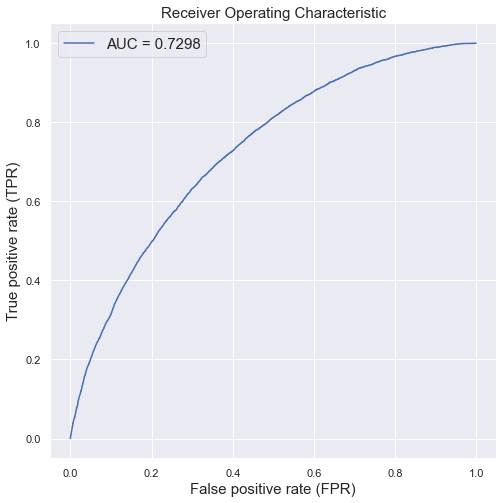

In [507]:
# Отрисовать ROC кривую
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score,confusion_matrix
from matplotlib import pyplot as plt

# Посчитать значения ROC кривой и значение площади под кривой AUC
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train).T[1])
roc_auc = roc_auc_score(y_train, model.predict_proba(X_train).T[1])   
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.title('Receiver Operating Characteristic', fontsize=15)
plt.xlabel('False positive rate (FPR)', fontsize=15)
plt.ylabel('True positive rate (TPR)', fontsize=15)
plt.legend(fontsize=15)

## Test Tree

### Тест 6 DecisionTreeClassifier

In [508]:
from sklearn.tree import DecisionTreeClassifier

In [509]:
dtc = DecisionTreeClassifier()

In [510]:
model_start(dtc, train, scoring)

F1-score:
0.2061102944553109

Conf_matrix:
[[11169  1764]
 [ 1405   422]]

Roc_auc:
0.5427852912072237

Average_precision
0.1424234148564725

Recall
0.2211396174047464


### Тест RandomForestRegressor

In [511]:
from sklearn.ensemble import RandomForestClassifier

In [512]:
X = train.drop('default', axis=1).values
y = train['default'].values

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [514]:
model = RandomForestClassifier(n_estimators=100)

In [515]:
model_start(model, train, scoring)

F1-score:
0.0541796761740577

Conf_matrix:
[[12843    90]
 [ 1773    54]]

Roc_auc:
0.6895780038990782

Average_precision
0.2379454032734912

Recall
0.029223567024434804


# Predict Kaggle

In [516]:
model = LogisticRegression(class_weight = 'balanced', max_iter = 1000, 
                           penalty = 'l2', random_state = 42,
                           solver = 'lbfgs', tol = 0.001)

In [517]:
X_train = train.drop('default', axis=1).values
y_train = train['default'].values

In [518]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   tol=0.001)

In [519]:
# Предсказание для кагл
y_predict_kaggle = model.predict(test.values)

In [520]:
sample_submission['default'] = y_predict_kaggle

In [521]:
sample_submission['default'].mean()

0.379707832402542

In [522]:
sample_submission['default'].value_counts()

0    22547
1    13802
Name: default, dtype: int64

In [523]:
#from google.colab import files
#sample_submission.to_csv('submission_kaggle.csv', sep=',', index=False)
#files.download('submission_kaggle.csv')